In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [2]:
data = pd.read_csv('Electric_production.csv')
data = data.rename(columns={"IPG2211A2N": "y","DATE":"date"})
data.head()

,date,y
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
model = SARIMAX(data["y"],order=(3,1,3),seasonal_order=(2,1,2,12))

In [4]:
res = model.fit()

C:\Users\Master\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
res.summary() #aic is important

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  397
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -875.120
Date:                                 Wed, 29 Jan 2025   AIC                           1772.239
Time:                                         14:57:51   BIC                           1815.696
Sample:                                              0   HQIC                          1789.476
                                                 - 397                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0106      0.132     -0.080      0.936      -0.270       0.248
ar.L2         -0.5910      0.113     -5.222      0.000      -0.813      -0.369
ar.L3          0.4757      0.061      7.828      0.000       0.357       0.595
ma.L1         -0.4289      0.125     -3.429      0.001      -0.674      -0.184
ma.L2          0.3132      0.139      2.246      0.025       0.040       0.587
ma.L3         -0.7784      0.119     -6.525      0.000      -1.012      -0.545
ar.S.L12       0.5551      0.155      3.591      0.000       0.252       0.858
ar.S.L24      -0.3361      0.060     -5.649      0.000      -0.453      -0.219
ma.S.L12      -1.2550      0.149     -8.397      0.000      -1.548      -0.962
ma.S.L24       0.5034      0.121      4.160      0.000       0.266       0.741
sigma2         5.3650      0.319     16.844      0.000       4.741       5.989
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                23.05
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
data["SARIMAX"]=res.fittedvalues

In [7]:
data

,date,y,SARIMAX
0,1/1/1985,72.5052,0.000000
1,2/1/1985,70.6720,72.505103
2,3/1/1985,62.4502,70.671916
3,4/1/1985,57.4714,62.450243
4,5/1/1985,55.3151,57.471440
...,...,...,...
392,9/1/2017,98.6154,98.963914
393,10/1/2017,93.6137,91.114243
394,11/1/2017,97.3359,96.217209
395,12/1/2017,114.7212,111.599094


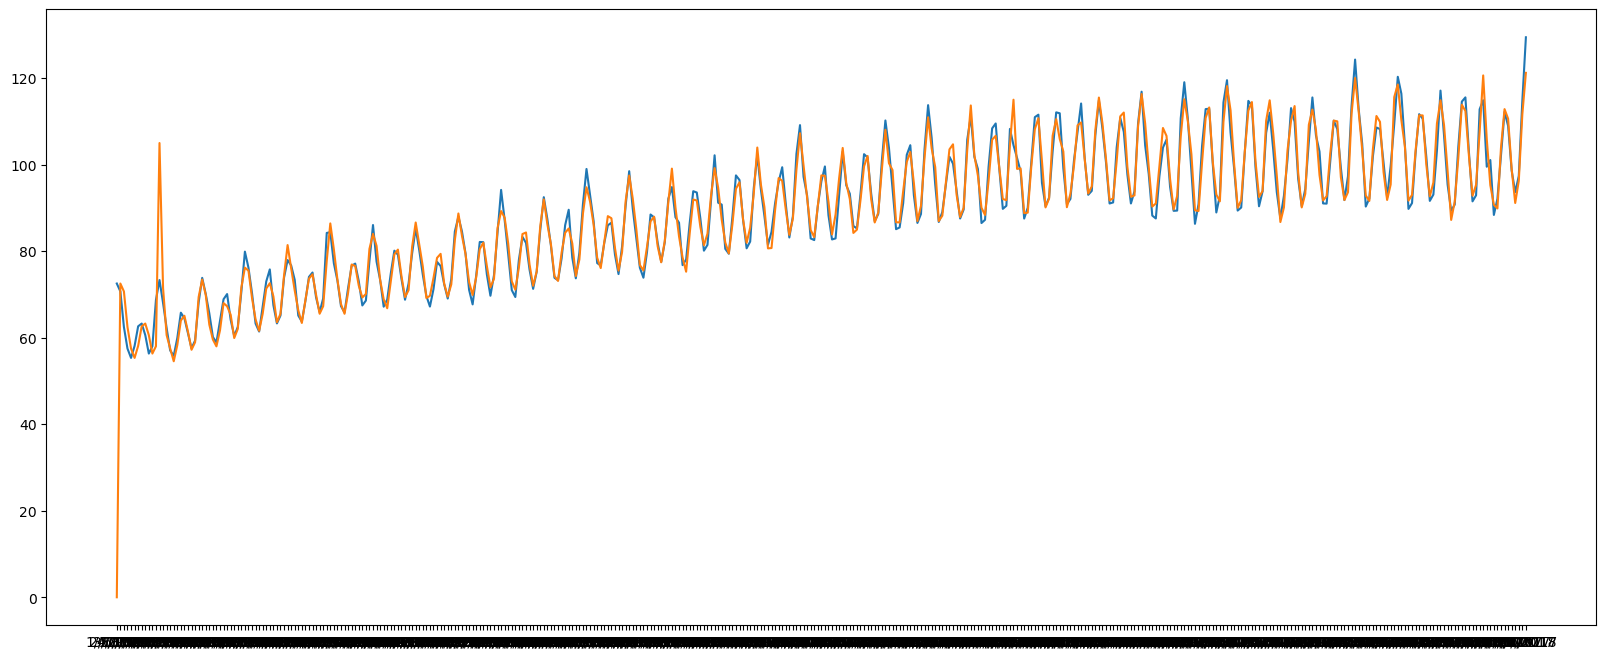

In [8]:
plt.figure(figsize=(20,8))
plt.plot(data["date"],data["y"])
plt.plot(data["date"], data["SARIMAX"])
plt.show()

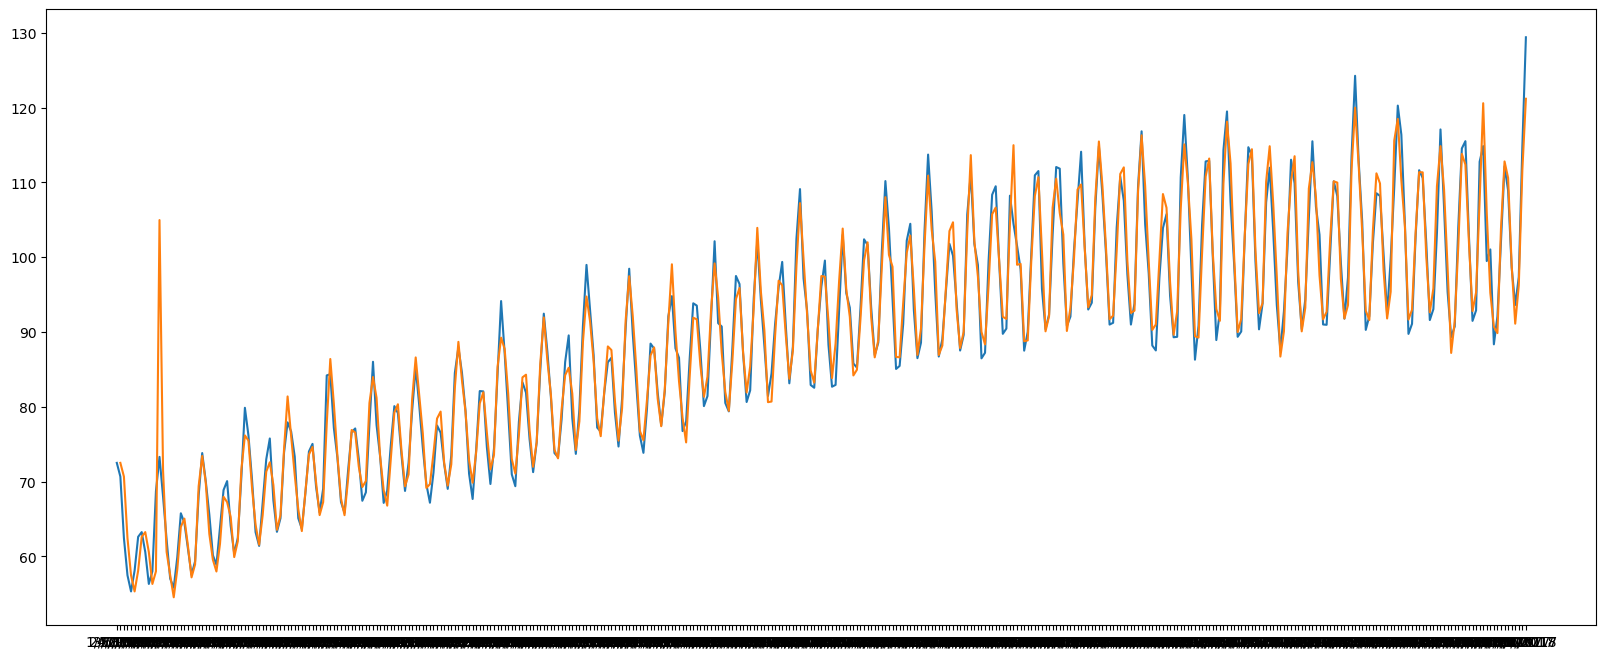

In [9]:
plt.figure(figsize=(20,8))
plt.plot(data["date"],data["y"])
plt.plot(data["date"].iloc[1:], data["SARIMAX"].iloc[1:])
plt.show()

In [10]:
# data["SARIMAX"][:5]= np.NaN
forecast = res.predict(start=len(data),end=len(data)+10)

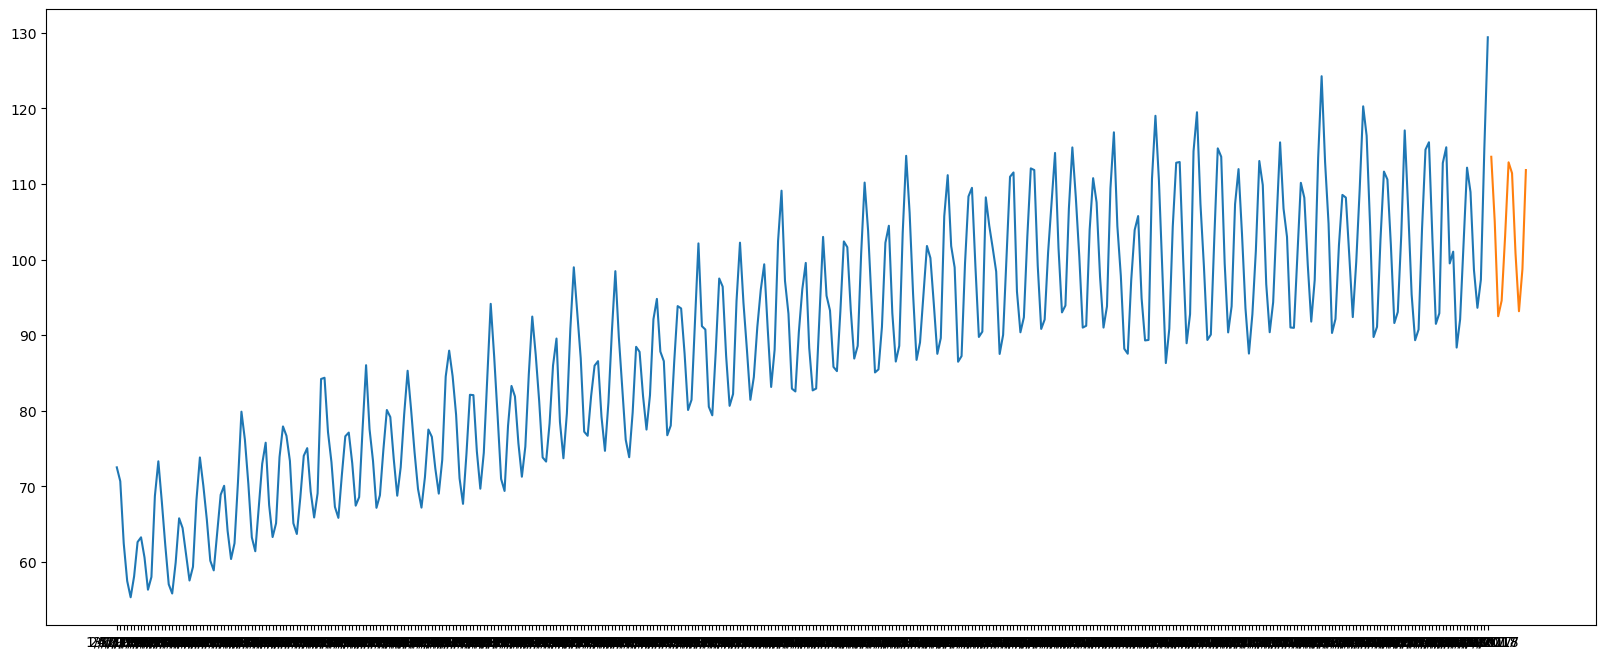

In [11]:
plt.figure(figsize=(20,8))
plt.plot(data["date"],data["y"])
plt.plot(forecast.index,forecast)
plt.show()

In [12]:
q = range(0, 3)
d = [1]
p = range(0, 3)
P = range(0, 3)
D = [1]
Q = range(0, 3)
s = [4,6]

In [13]:
params = list(itertools.product(p, d, q, P, D, Q, s))
params

[(0, 1, 0, 0, 1, 0, 4),
 (0, 1, 0, 0, 1, 0, 6),
 (0, 1, 0, 0, 1, 1, 4),
 (0, 1, 0, 0, 1, 1, 6),
 (0, 1, 0, 0, 1, 2, 4),
 (0, 1, 0, 0, 1, 2, 6),
 (0, 1, 0, 1, 1, 0, 4),
 (0, 1, 0, 1, 1, 0, 6),
 (0, 1, 0, 1, 1, 1, 4),
 (0, 1, 0, 1, 1, 1, 6),
 (0, 1, 0, 1, 1, 2, 4),
 (0, 1, 0, 1, 1, 2, 6),
 (0, 1, 0, 2, 1, 0, 4),
 (0, 1, 0, 2, 1, 0, 6),
 (0, 1, 0, 2, 1, 1, 4),
 (0, 1, 0, 2, 1, 1, 6),
 (0, 1, 0, 2, 1, 2, 4),
 (0, 1, 0, 2, 1, 2, 6),
 (0, 1, 1, 0, 1, 0, 4),
 (0, 1, 1, 0, 1, 0, 6),
 (0, 1, 1, 0, 1, 1, 4),
 (0, 1, 1, 0, 1, 1, 6),
 (0, 1, 1, 0, 1, 2, 4),
 (0, 1, 1, 0, 1, 2, 6),
 (0, 1, 1, 1, 1, 0, 4),
 (0, 1, 1, 1, 1, 0, 6),
 (0, 1, 1, 1, 1, 1, 4),
 (0, 1, 1, 1, 1, 1, 6),
 (0, 1, 1, 1, 1, 2, 4),
 (0, 1, 1, 1, 1, 2, 6),
 (0, 1, 1, 2, 1, 0, 4),
 (0, 1, 1, 2, 1, 0, 6),
 (0, 1, 1, 2, 1, 1, 4),
 (0, 1, 1, 2, 1, 1, 6),
 (0, 1, 1, 2, 1, 2, 4),
 (0, 1, 1, 2, 1, 2, 6),
 (0, 1, 2, 0, 1, 0, 4),
 (0, 1, 2, 0, 1, 0, 6),
 (0, 1, 2, 0, 1, 1, 4),
 (0, 1, 2, 0, 1, 1, 6),
 (0, 1, 2, 0, 1, 2, 4),
 (0, 1, 2, 0, 1,

In [14]:
best_aic = np.inf
best_params = None
best_model = None

In [15]:
print(data.dtypes)

date        object
y          float64
SARIMAX    float64
dtype: object


In [16]:
for param in params:
    try:
        model = SARIMAX(data["y"], order=(param[0], param[1], param[2]),seasonal_order=(param[3], param[4], param[5], param[6]))
        model_fit = model.fit(disp=False)
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = param
            best_model = model_fit
    except:
        continue
print(best_params)
print(best_model)

C:\Users\Master\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Master\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Master\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Master\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Master\anaconda3\Lib\si

(1, 1, 1, 1, 1, 2, 6)


In [17]:
model = SARIMAX(data["y"], order=(best_params[0], best_params[1], best_params[2]),seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]))
best_res = model.fit()
best_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -900.661
Date:                                Wed, 29 Jan 2025   AIC                           1813.323
Time:                                        14:59:29   BIC                           1837.119
Sample:                                             0   HQIC                          1822.756
                                                - 397                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5386      0.044     12.186      0.000       0.452       0.625
ma.L1         -0.9642      0.016    -59.636      0.000      -0.996      -0.933
ar.S.L6       -0.9978      0.002   -404.764      0.000      -1.003      -0.993
ma.S.L6        0.1111      0.037      2.974      0.003       0.038       0.184
ma.S.L12      -0.7834      0.037    -21.421      0.000      -0.855      -0.712
sigma2         5.5953      0.312     17.919      0.000       4.983       6.207
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                40.32
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
pred = best_res.predict(start=len(data),end = len(data)+20)

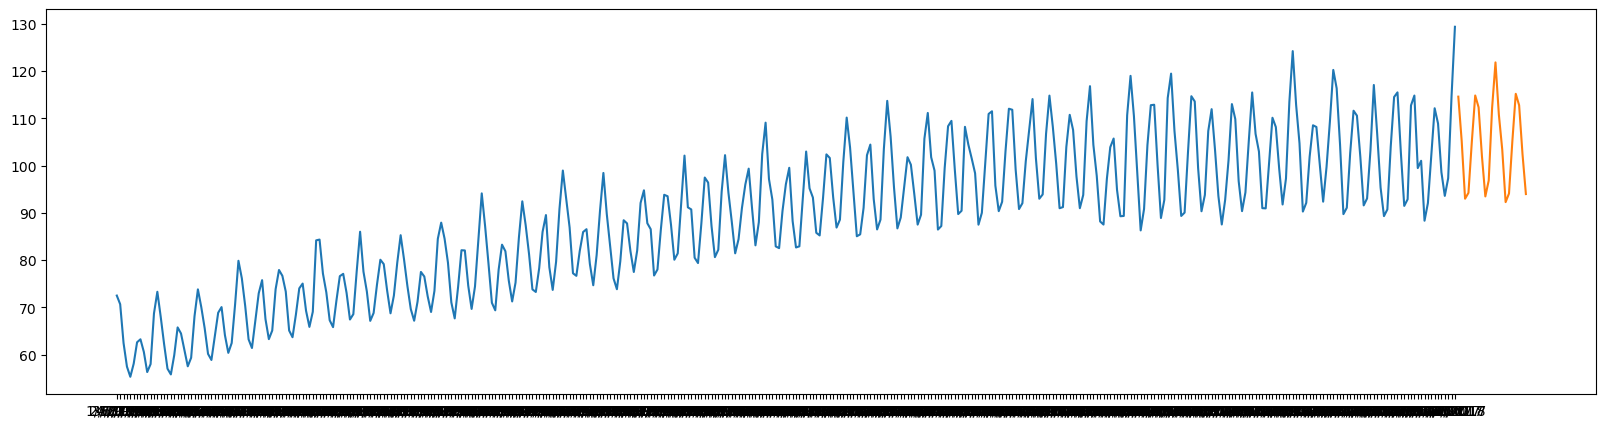

In [42]:
plt.figure(figsize=(20,5))
plt.plot(data["date"],data["y"])
plt.plot(pred.index,pred)
plt.show()